<a href="https://colab.research.google.com/github/MaxVer01/Dataset-projectdataminingHAN/blob/main/Data_Mining_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

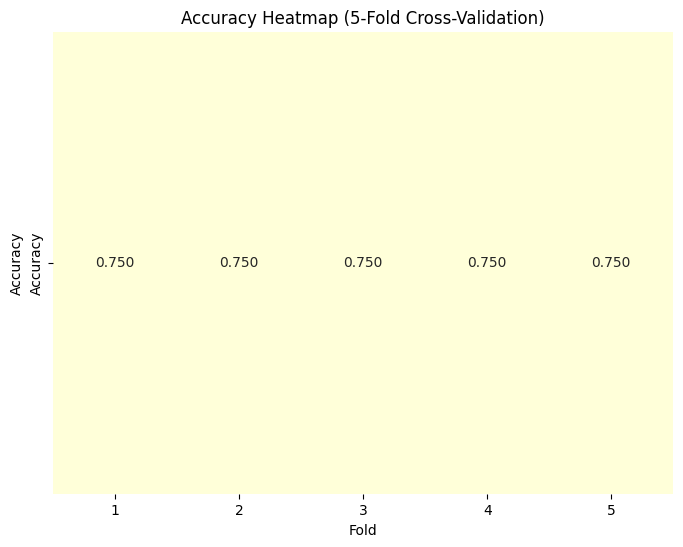

Mean Accuracy: 0.75


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/MaxVer01/Dataset-projectdataminingHAN/main/processed-data.csv"
data = pd.read_csv(url)

# Split the data into features (X) and the target variable (y)
X = data.drop('Severity_Moderate', axis=1)  # Features (independent variables)
y = data['Severity_Moderate']  # Target variable (dependent variable)

# Create a logistic regression model
model = LogisticRegression()

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Create a DataFrame to store the cross-validation scores
cv_scores_df = pd.DataFrame({'Fold': range(1, 6), 'Accuracy': cross_val_scores})

# Create a heatmap of the cross-validation scores
plt.figure(figsize=(8, 6))
sns.heatmap(pd.pivot_table(cv_scores_df, values='Accuracy', columns='Fold'), annot=True, cmap="YlGnBu", cbar=False, fmt=".3f")
plt.title("Accuracy Heatmap (5-Fold Cross-Validation)")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.show()

# Calculate and print the mean accuracy across all folds
mean_accuracy = cross_val_scores.mean()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
